In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1]:
%pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 718.2 kB/s eta 0:00:11
   -- ------------------------------------- 0.5/8.1 MB 718.2 kB/s eta 0:00:11
   --- ------------------------------------ 0.8/8.1 MB 729.4 kB/s eta 0:00:10
   ----- ---------------------------------- 1.0/8.1 MB 780.6 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 812.0 kB/s eta 0:00:09
   ------ --------------------------------- 1.3/8.1 MB 812.0 kB/s eta 0:00:09
   ------- -------------------------------- 1.6/8.1 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import warnings
warnings.simplefilter("ignore")

In [4]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.drop(columns=['Unnamed: 0','Booking_ID'],inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(21359, 18)

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df["booking_status"].value_counts()   #imbalance

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [14]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [15]:
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved',
            'market_segment_type','repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [16]:

len(num_cols)

12

In [17]:
len(cat_cols)

6

In [ ]:
###eda##

In [18]:
data=df.copy()

UNIVARIATE ANALYSIS

In [19]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()


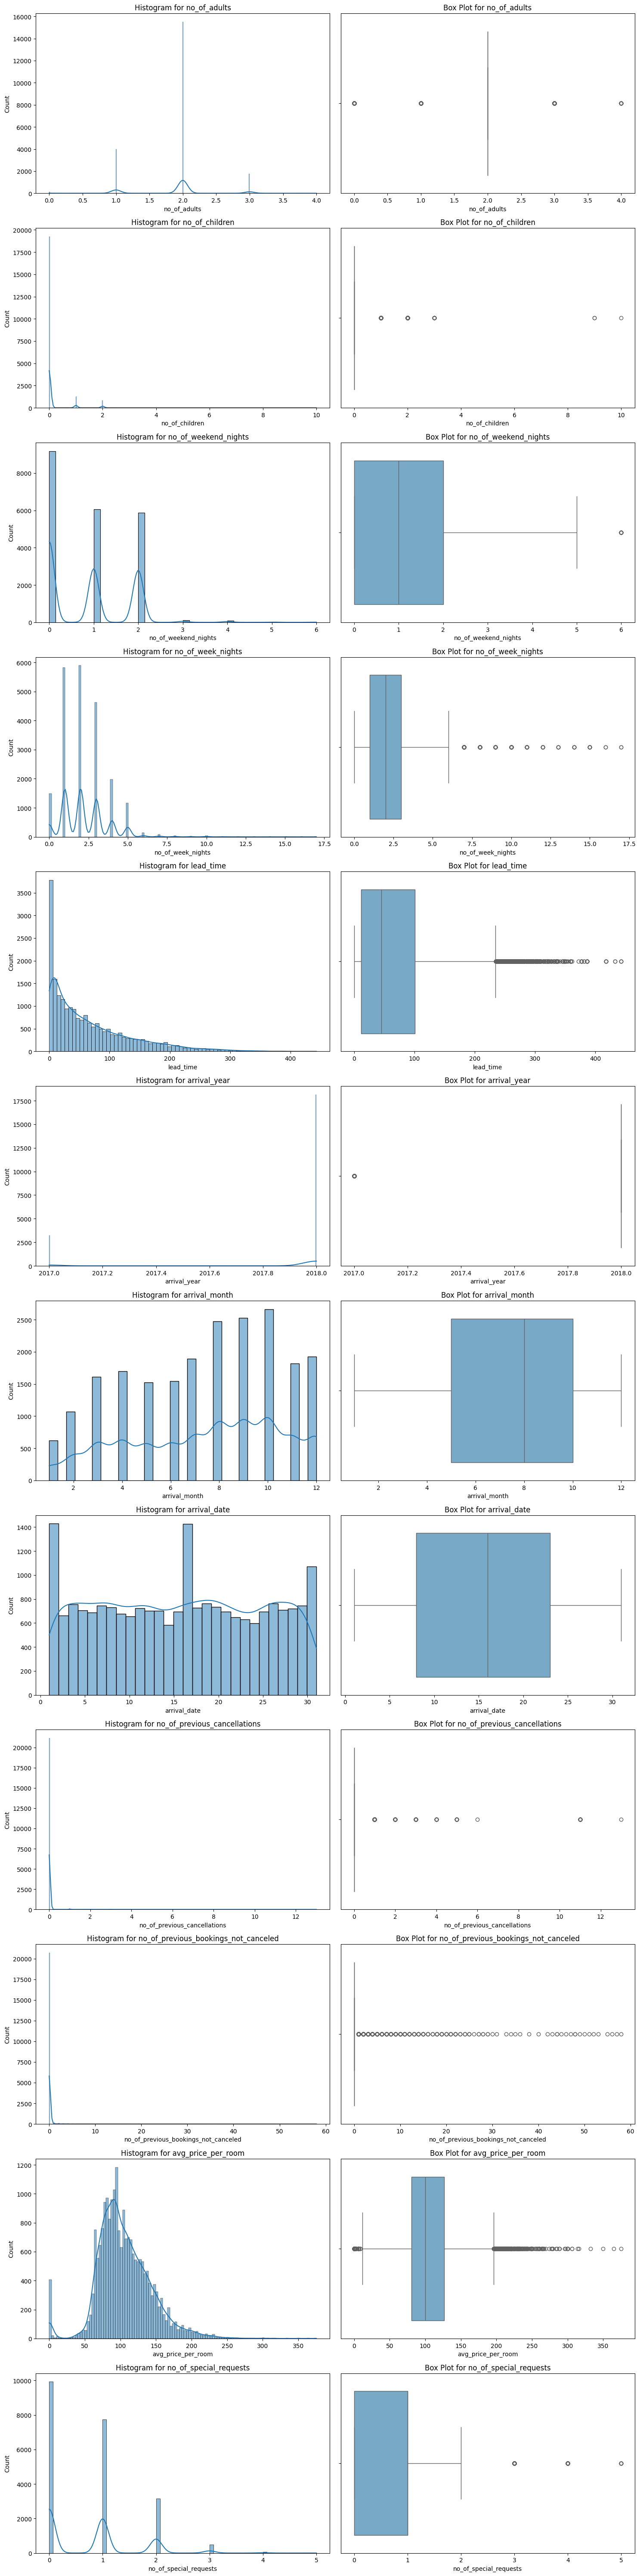

In [20]:
num_plot_dist(data,num_cols)

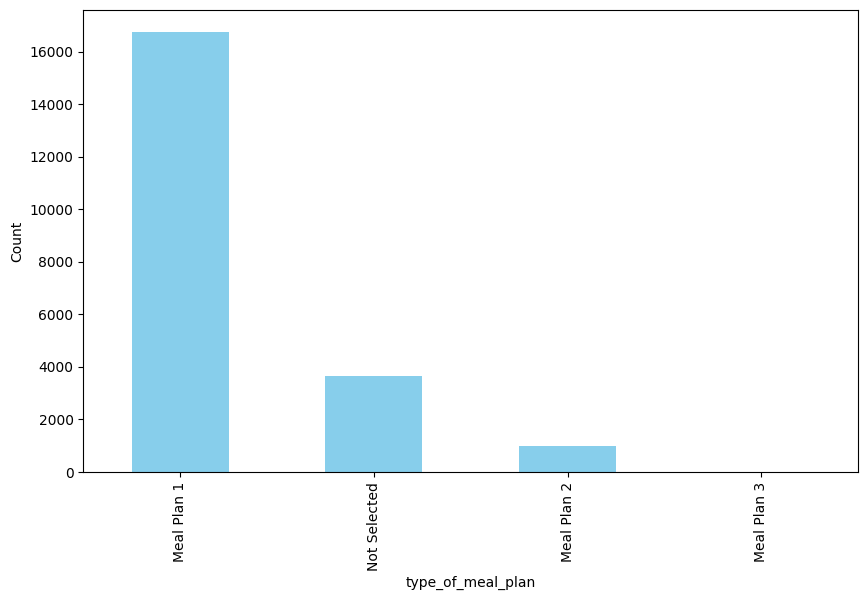

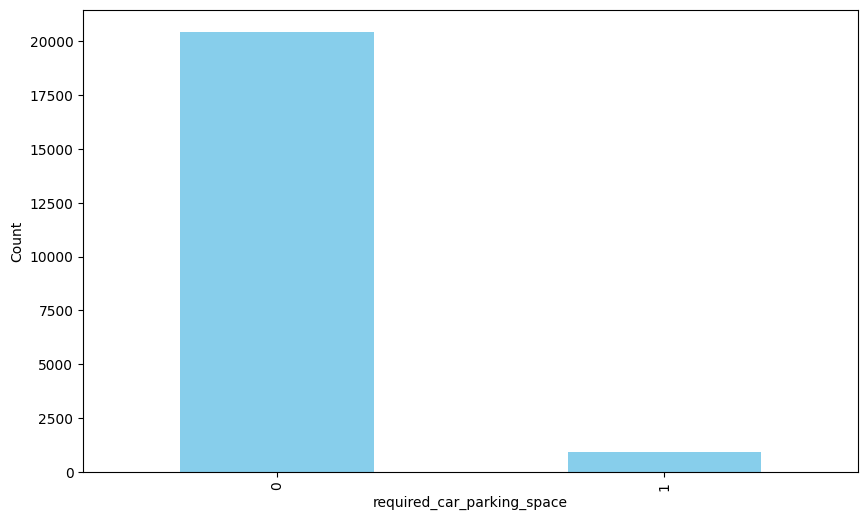

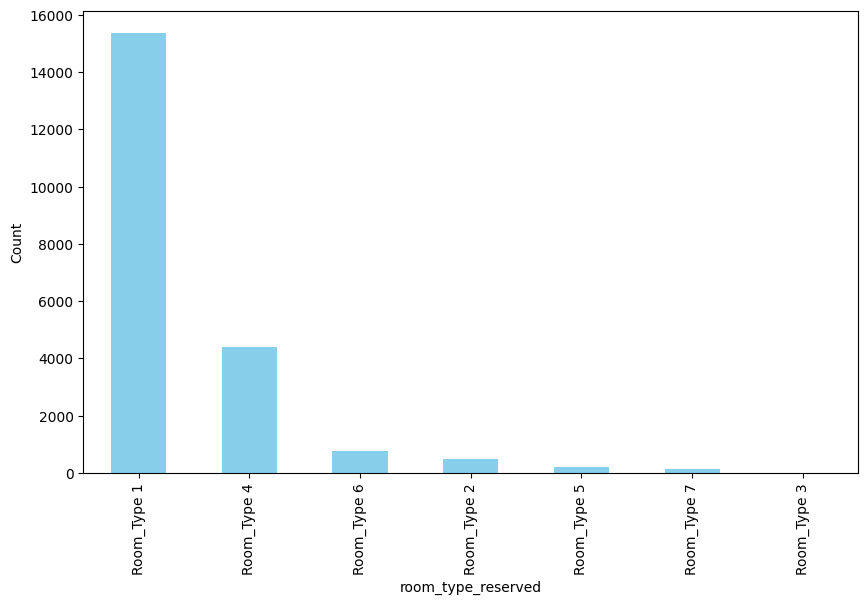

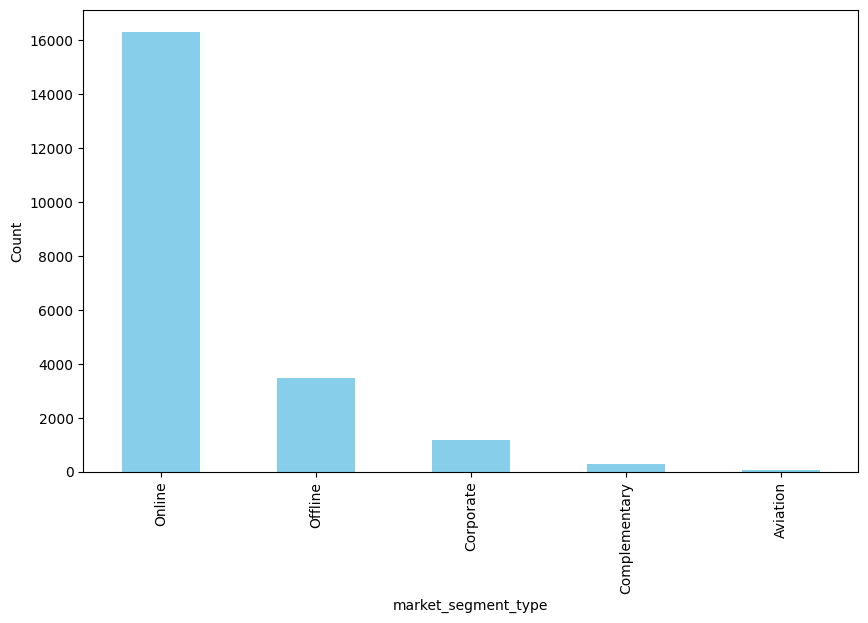

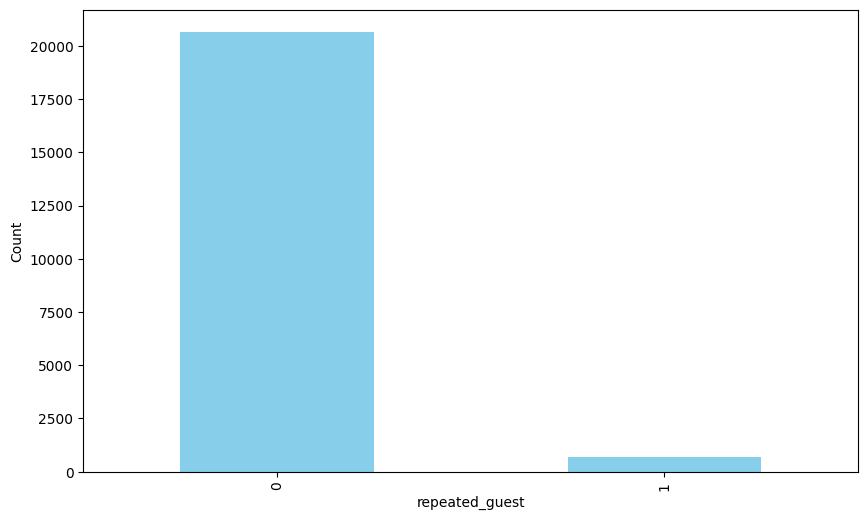

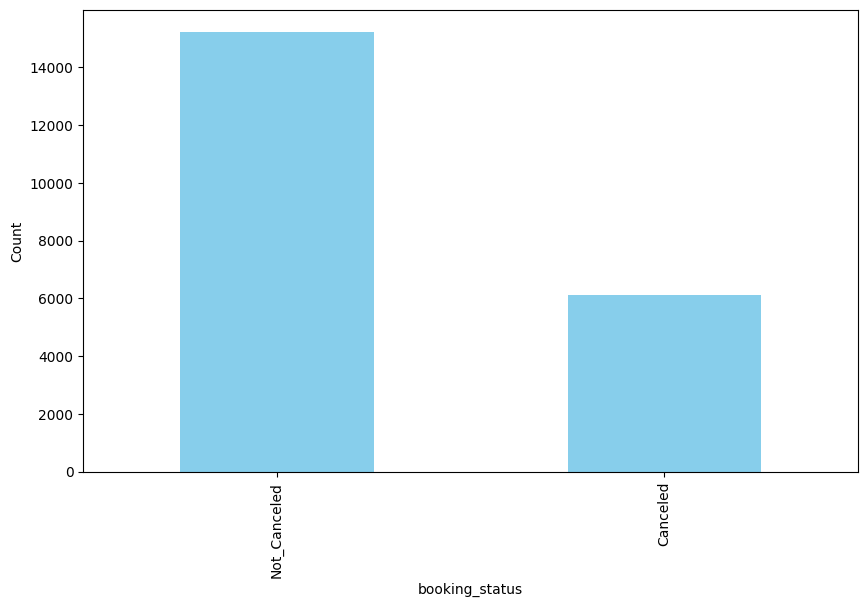

In [21]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color = 'skyblue')
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show

BIVARIATE ANALYSIS

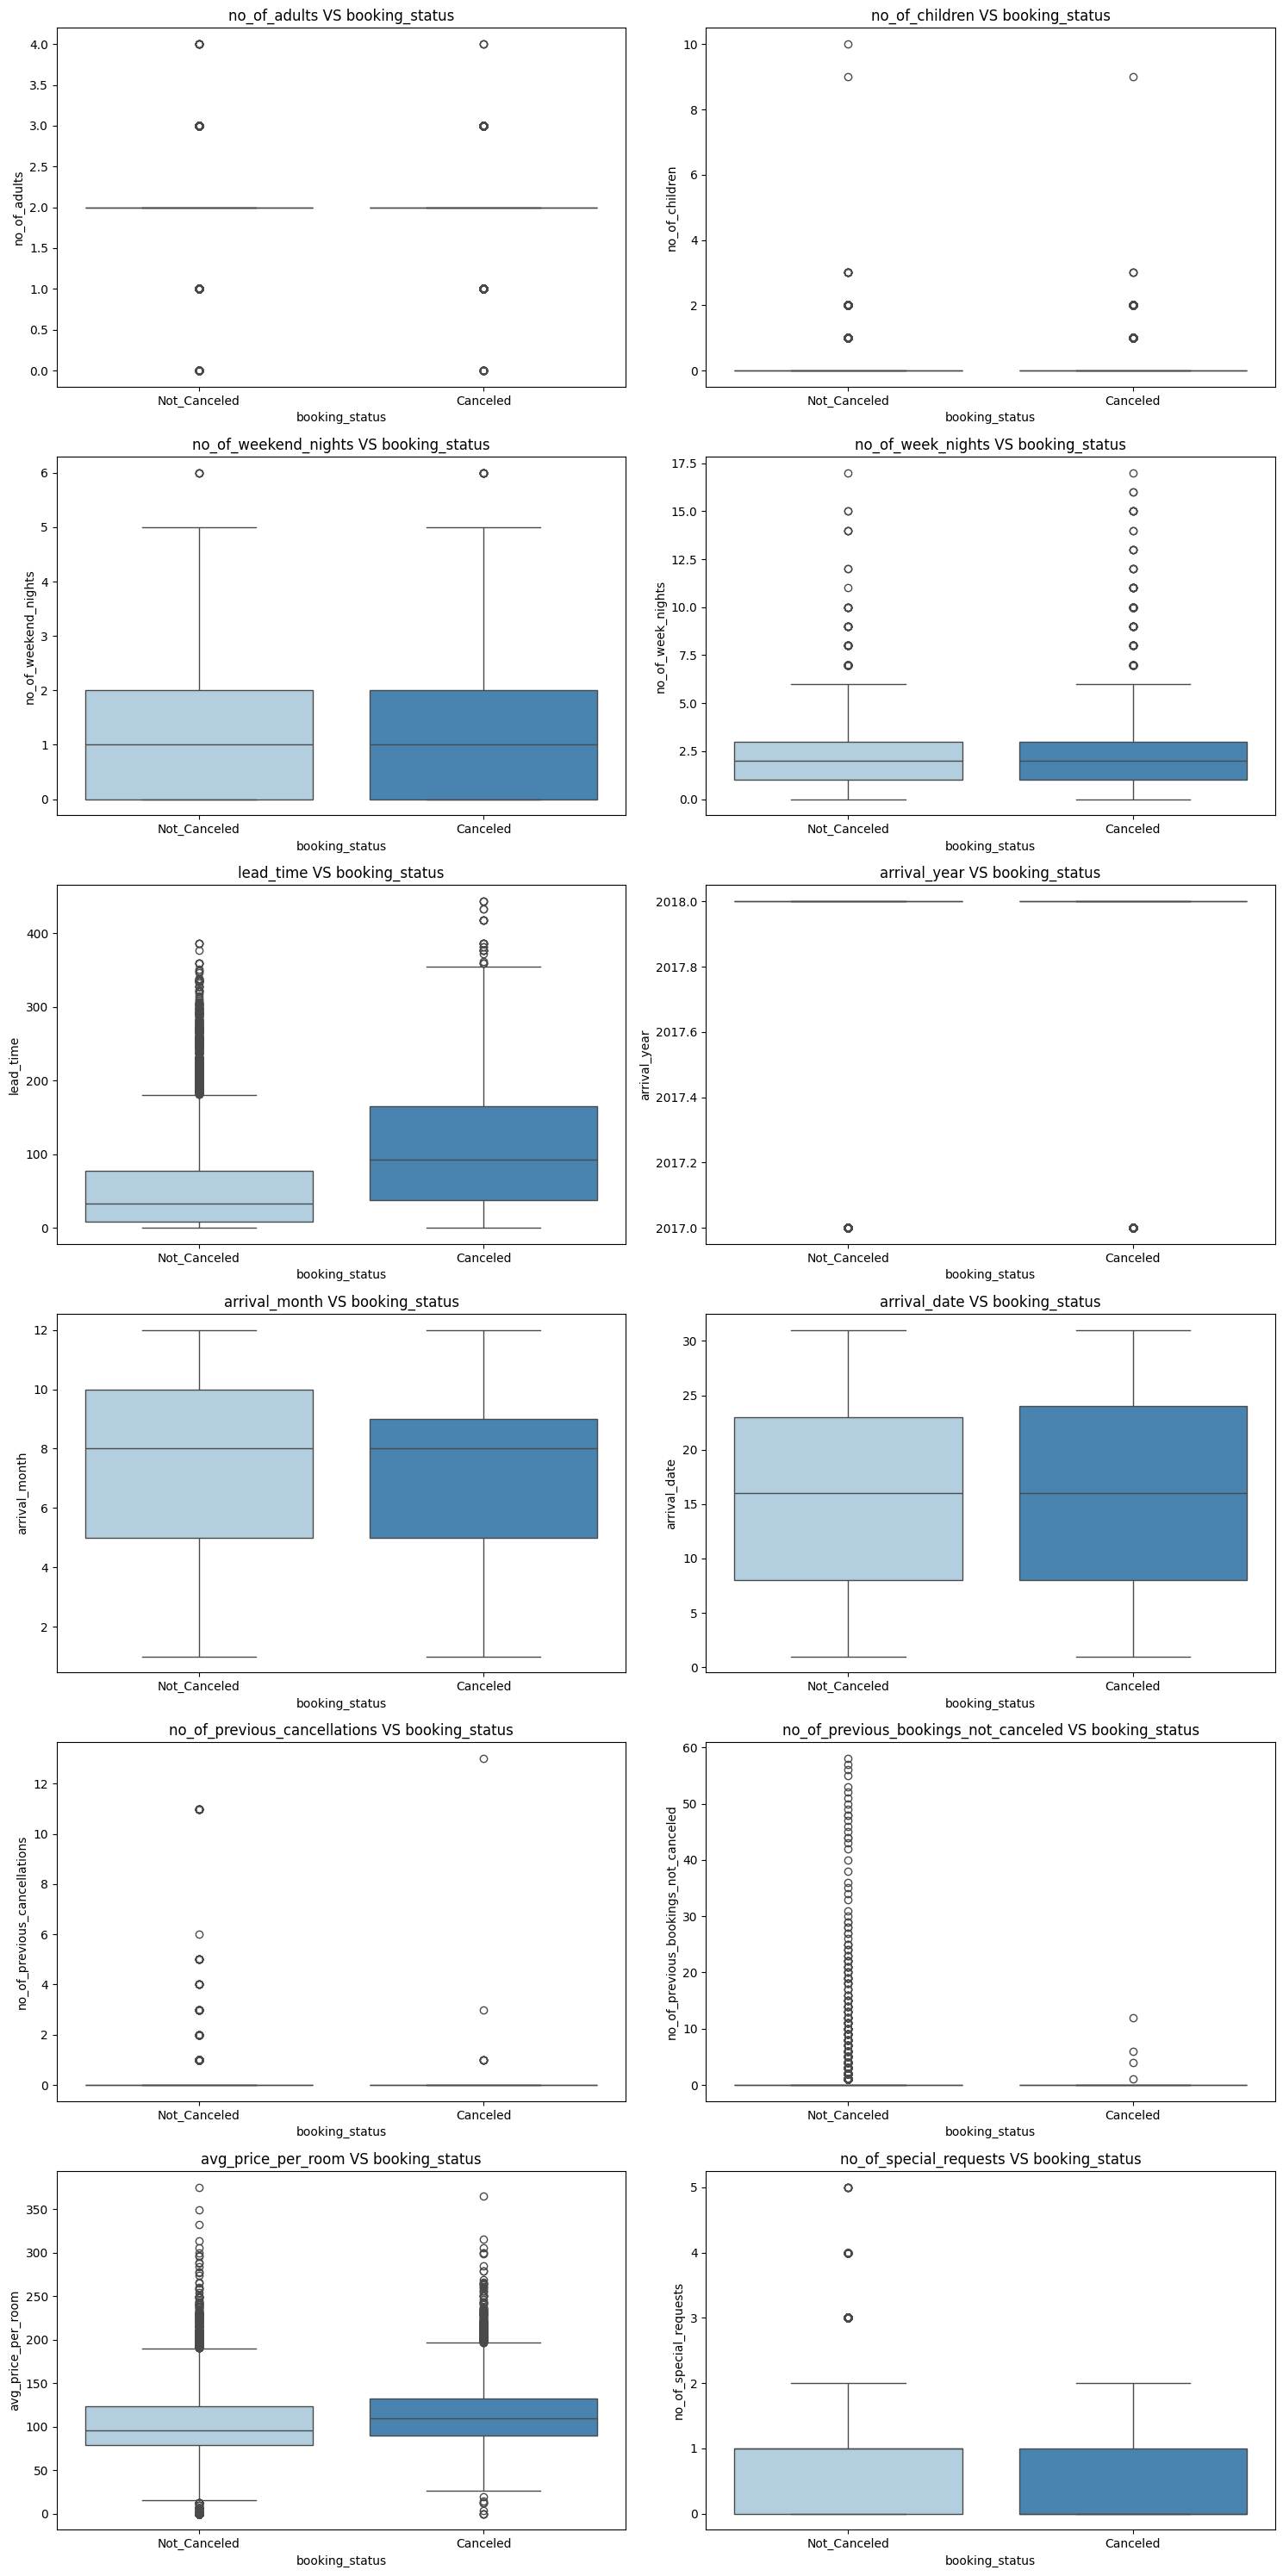

In [22]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

# Example usage:
plot_bivariate_num(data, 'booking_status', num_cols)


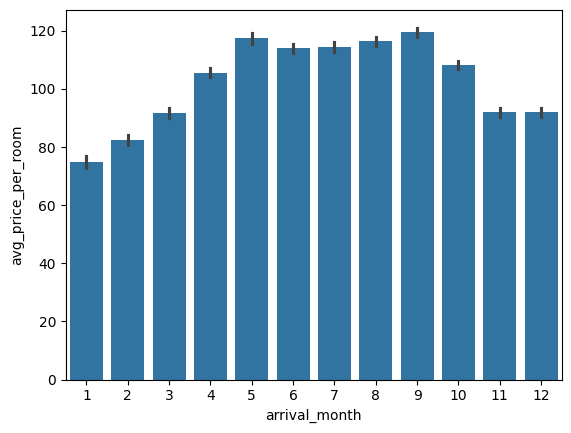

In [23]:
sns.barplot(x='arrival_month', y = "avg_price_per_room",data=data)
plt.show()

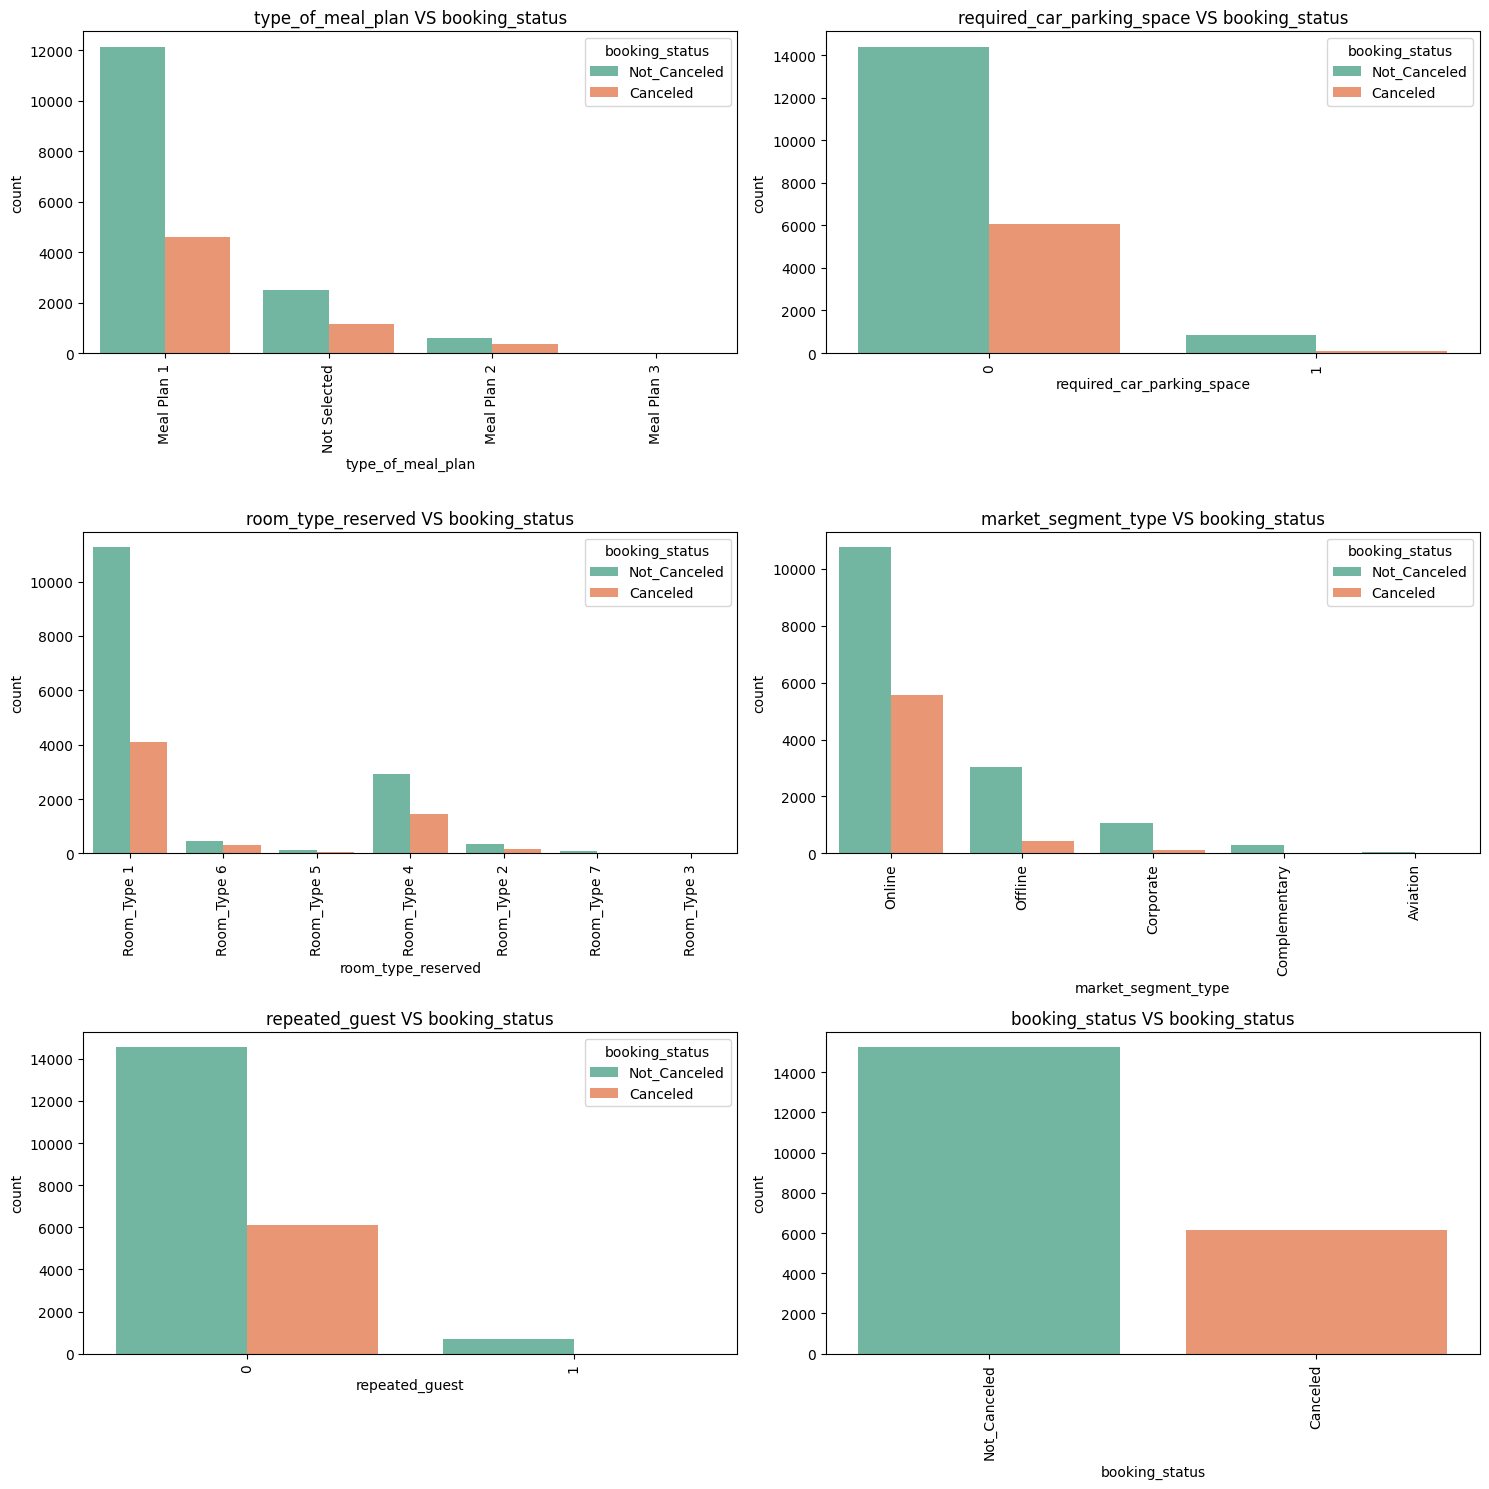

In [24]:
def plot_bivariate_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_bivariate_cat(data, 'booking_status', cat_cols)


DATA PROCESSING

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [26]:
## label encoding
from sklearn.preprocessing import LabelEncoder

In [27]:
label_encoder = LabelEncoder()
mappings={}
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}

In [28]:
mappings


{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [32]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

MULTI COLLINERAITY

In [36]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 6.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.8 MB 10.1 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 11.1 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 6.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 6.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 6.4 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 5.9 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.8 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Add constant to the DataFrame
X = add_constant(df)

# Create a DataFrame to hold VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 

In [30]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


if the value is above 5 thers multicollinearity issue and >10 high collinearity.Above values indicate that thers no multi collinearity

In [39]:
corr = df.corr(
    
)

In [40]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

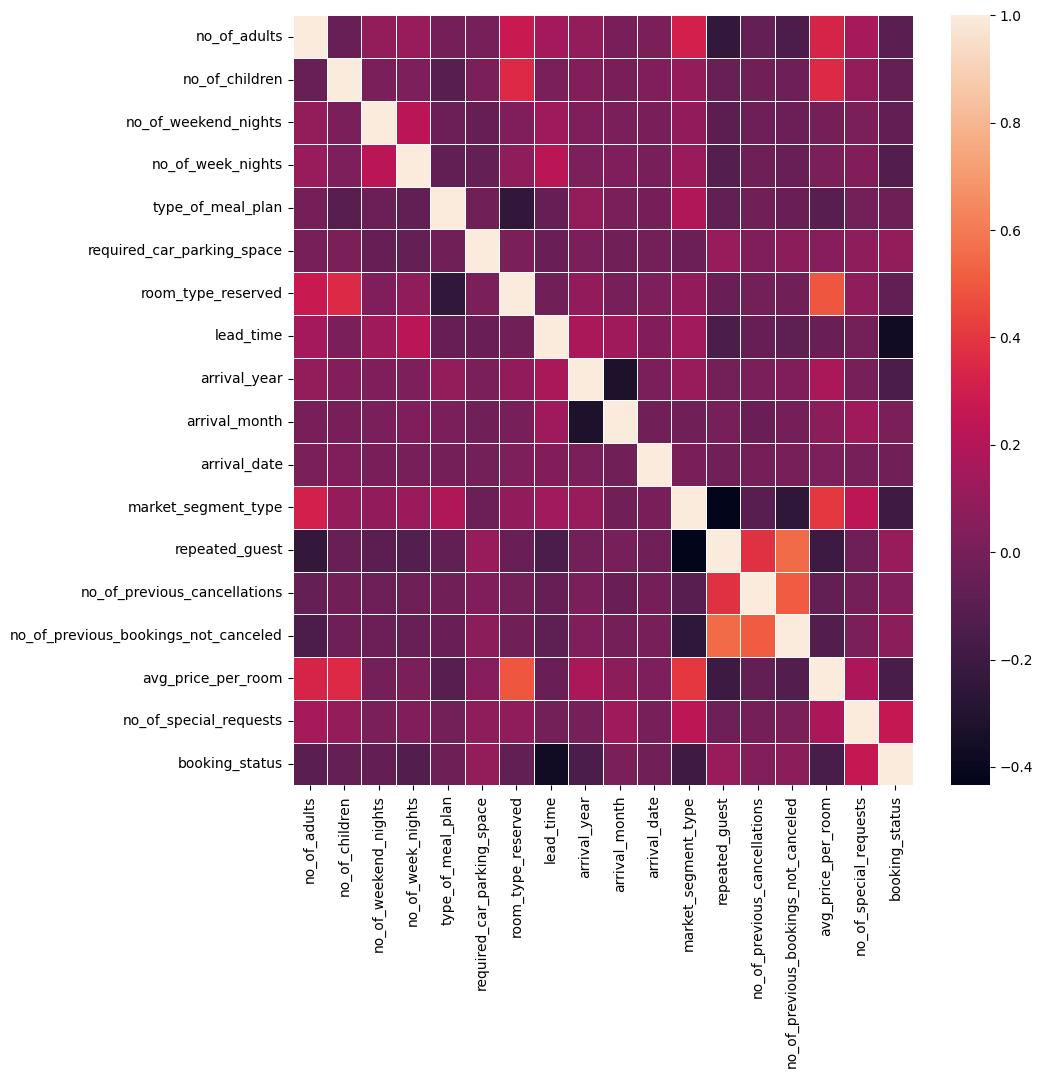

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, linewidths=0.5)

SKEWNESS

In [31]:
skewness = df.skew()

In [32]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [33]:
import numpy as np

for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])


In [34]:
skewness = df.skew()

In [35]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

handle data imbalance

In [48]:
%pip install imbalanced-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
%pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0


  Using cached scikit-learn-1.3.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): still running...
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [649 lines of output]
      Partial import of sklearn during the build process.
      test_program.c
      Generating code
      Finished generating code
      test_program.c
      LINK : warning LNK4044: unrecognized option '/openmp'; ignored
      Generating code
      Finished generating code
      Compiling sklearn\__check_build\_check_build.pyx because it changed.
      Compiling sklearn\_isotonic.pyx because it changed.
      Compiling sklearn\_loss\_loss.pyx because it changed.
      Compiling sklearn\cluster\_dbscan_inner.pyx because it changed.
      Compiling sklearn\cluster\_hierarchical_fast.pyx because it changed.
      Compiling sklearn\cluster\_k_means_common.pyx because it changed.
      Compiling sklearn\cluster\_k_means_lloyd.pyx because it changed.
      Compiling sklearn\cluster\_k_means_elkan.pyx because it changed.
      Compiling sklea

In [36]:
from imblearn.over_sampling import SMOTE


In [38]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [39]:
smote = SMOTE(random_state=42)
X_res , y_res = smote.fit_resample(X,y)

In [40]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [41]:
df.shape

(21359, 18)

In [43]:
balanced_df = pd.DataFrame(X_res,columns=X.columns)
balanced_df["booking_status"] = y_res

In [44]:
balanced_df.shape

(30462, 18)

In [45]:
df=balanced_df.copy()

In [46]:
df.shape

(30462, 18)

FEATURE SELECTION

In [47]:
len(df.columns)

18

In [49]:
from sklearn.ensemble import RandomForestClassifier


In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [51]:
feature_importance=model.feature_importances_

In [52]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance' : feature_importance
})

In [53]:
feature_importance_df

,feature,importance
0,no_of_adults,0.020094
1,no_of_children,0.009397
2,no_of_weekend_nights,0.037834
3,no_of_week_nights,0.055839
4,type_of_meal_plan,0.016781
5,required_car_parking_space,0.008540
6,room_type_reserved,0.018505
7,lead_time,0.283888
8,arrival_year,0.021267
9,arrival_month,0.079493


In [54]:
feature_importance_df.sort_values(by="importance",ascending=False)

,feature,importance
7,lead_time,0.283888
15,avg_price_per_room,0.161256
16,no_of_special_requests,0.120572
10,arrival_date,0.097354
9,arrival_month,0.079493
11,market_segment_type,0.064261
3,no_of_week_nights,0.055839
2,no_of_weekend_nights,0.037834
8,arrival_year,0.021267
0,no_of_adults,0.020094


In [55]:
top_features_importance_df = feature_importance_df.sort_values(by="importance",ascending=False)

In [56]:
len(df.columns)

18

In [57]:
top_10_features = top_features_importance_df["feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [58]:
top_10_df.head()

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults,booking_status
0,26,161.00,0,17,10,4,1,2,2017,2,1
1,98,121.50,2,16,7,4,1,1,2018,2,1
2,433,70.00,0,8,9,3,3,0,2018,2,0
3,195,72.25,0,8,8,3,5,2,2018,2,1
4,188,130.00,0,15,6,3,2,0,2018,1,0


In [61]:
len(top_10_df.columns)

11

In [62]:
df = top_10_df.copy()

MODEL SELECTION

In [63]:
%pip install xgboost lightgbm

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 2.1/150.0 MB 5.7 MB/s eta 0:00:27
   - -------------------------------------- 4.2/150.0 MB 6.9 MB/s eta 0:00:22
   - -------------------------------------- 6.3/150.0 MB 7.7 MB/s eta 0:00:19
   - -------------------------------------- 6.8/150.0 MB 7.2 MB/s eta 0:00:20
   - -------------------------------------- 7.1/150.0 MB 6.1 MB/s eta 0:00:24
   -- ------------------------------------- 7.6/150.0 MB 5.3 MB/s eta 0:00:28
   -- ------------------------------------- 8.4/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 9.7/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.7/150.0 MB 5.1 MB/s eta 0:00:28
   --- ------------------------------------ 12.1/150.0 MB 5.2 MB/s eta 0:00:27
   --- ------------------------------------ 13.1/150.0 MB 5.1 MB/s et


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier  # ✅ Corrected spelling
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score



In [66]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [69]:
from sklearn.neighbors import KNeighborsClassifier


In [70]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support vector classifier": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGboost": XGBClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(random_state=42)
}


In [71]:

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [72]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

In [73]:
metrics_df = pd.DataFrame(metrics)

In [74]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.891187,0.897588,0.885016,0.891258
1,LogisticRegression,0.788610,0.799597,0.774593,0.786896
2,Gradient Boosting,0.840309,0.825116,0.866775,0.845433
3,Support vector classifier,0.666667,0.642446,0.763192,0.697633
4,Decision Tree,0.838503,0.852842,0.821173,0.836708
5,KNN,0.781224,0.852047,0.684691,0.759256
6,Naive Bayes,0.751846,0.796423,0.681759,0.734644
7,XGboost,0.875103,0.874230,0.878502,0.876361
8,Adaboost,0.804202,0.821294,0.781433,0.800868
9,LGBM,0.866404,0.856962,0.882085,0.869342


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [76]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [78]:
rf = RandomForestClassifier(random_state=42)

In [82]:


params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)


In [83]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   4.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   4.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   4.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   4.1s
[CV] END bootstrap=True, max_depth=28, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=   6.7s
[CV] END bootstrap=True, max_depth=28, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=   6.6s
[CV] END bootstrap=True, max_depth=28, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=   7.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022780B25850>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022780331E50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022780331A90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022780B25350>},
                   random_state=42, scoring='accuracy', verbose=2)

In [84]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [85]:
best_rf_model = random_search.best_estimator_

In [86]:
y_pred = best_rf_model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [88]:
accuracy

0.8947973083866733

In [89]:
precision

0.8999012183075403

In [90]:
recall

0.890228013029316

In [92]:
f1

0.8950384804322908

In [93]:
import joblib

In [94]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [95]:
loaded_model = joblib.load("random_forest.pkl")

In [96]:
X_train[0:1]

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,no_of_weekend_nights,arrival_year,no_of_adults
4157,190,93.5,1,8,9,4,5,2,2017,2


In [98]:
new_data = np.array([190,1,93.5,9,8,4,5,2,0,0]).reshape(1,-1)

In [100]:
predictions = loaded_model.predict(new_data)

In [101]:
predictions

array([1])